# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data

In [4]:
data_info = pd.read_csv('TensorFlow_FILES/DATA/lending_club_info.csv', index_col='LoanStatNew')

In [5]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [6]:
# Fucntion to retrieve meaning of individual features
def feat_info(col_name):
    '''Function retrieves description of each column from the lending_club_info.csv dataset'''
    print(data_info.loc[col_name]['Description'])

In [7]:
# Load Data 
df = pd.read_csv('TensorFlow_FILES/DATA/lending_club_loan_two.csv')

In [8]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"


In [9]:
df.shape

(396030, 27)

In [10]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [12]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

# EDA

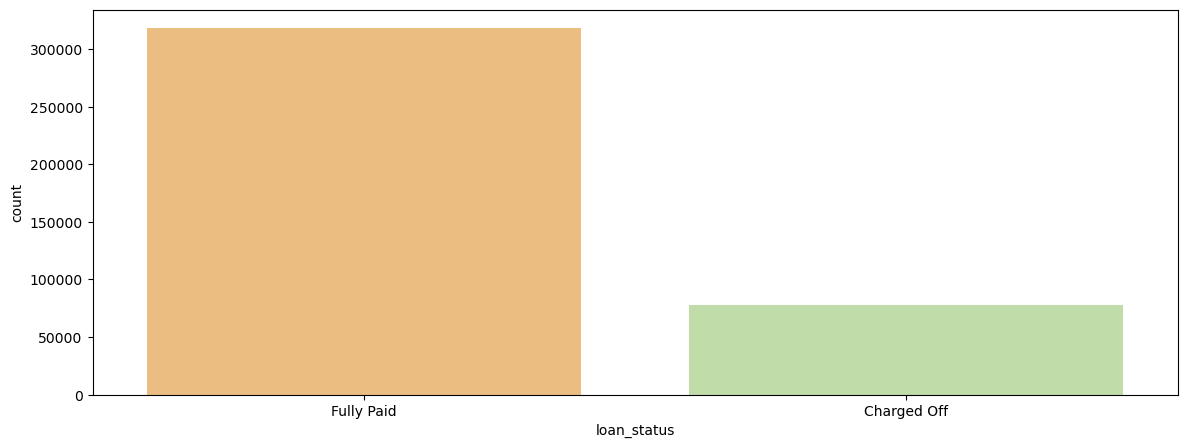

In [14]:
plt.figure(figsize = (14, 5))
sns.countplot(data = df, x = 'loan_status', hue = 'loan_status', palette = 'Spectral')
plt.show()

In [15]:
df['loan_status'].value_counts()
paid = (318357/(318357+77673))*100

print(f'Fully Paid: {paid} \nCharged Off:{100-paid}')

Fully Paid: 80.38709188697825 
Charged Off:19.612908113021746


An 80-20 ratio indicates an imbalanced class.

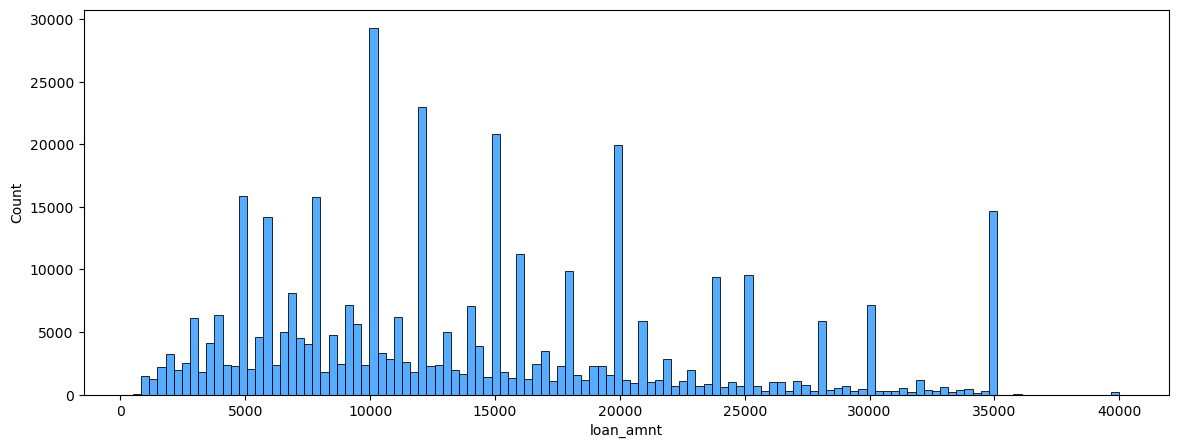

In [17]:
plt.figure(figsize=(14, 5))
sns.histplot(data = df, x = 'loan_amnt', color = 'dodgerblue')
plt.show()

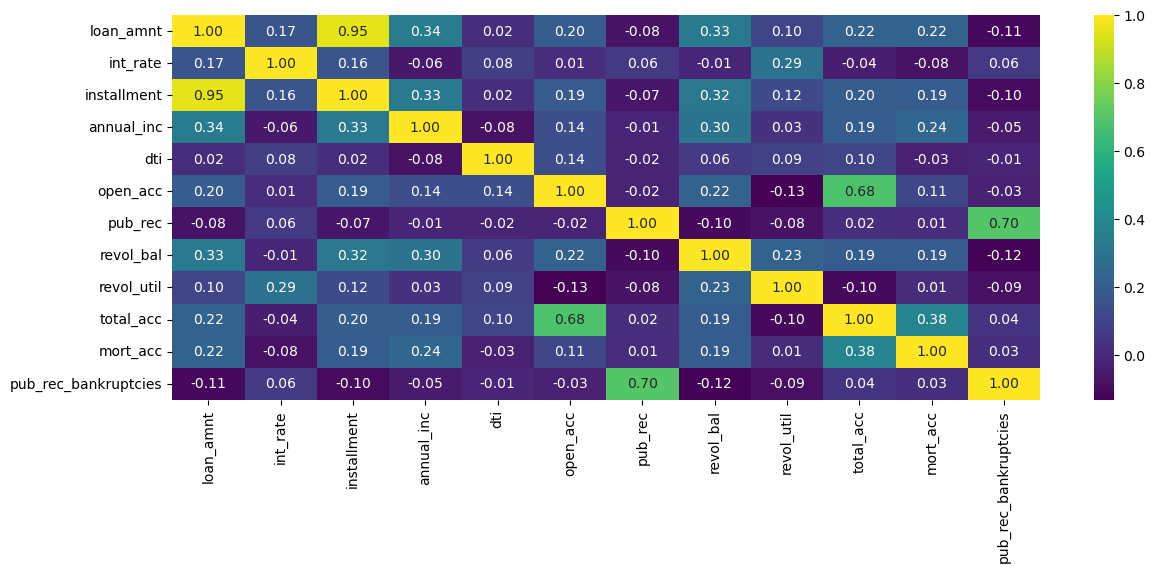

In [18]:
plt.figure(figsize = (14,5))
sns.heatmap(data = df.corr(numeric_only=True), cmap = 'viridis', annot = True, fmt = '.2f')
plt.show()

In [19]:
df['installment'].describe()

count    396030.000000
mean        431.849698
std         250.727790
min          16.080000
25%         250.330000
50%         375.430000
75%         567.300000
max        1533.810000
Name: installment, dtype: float64

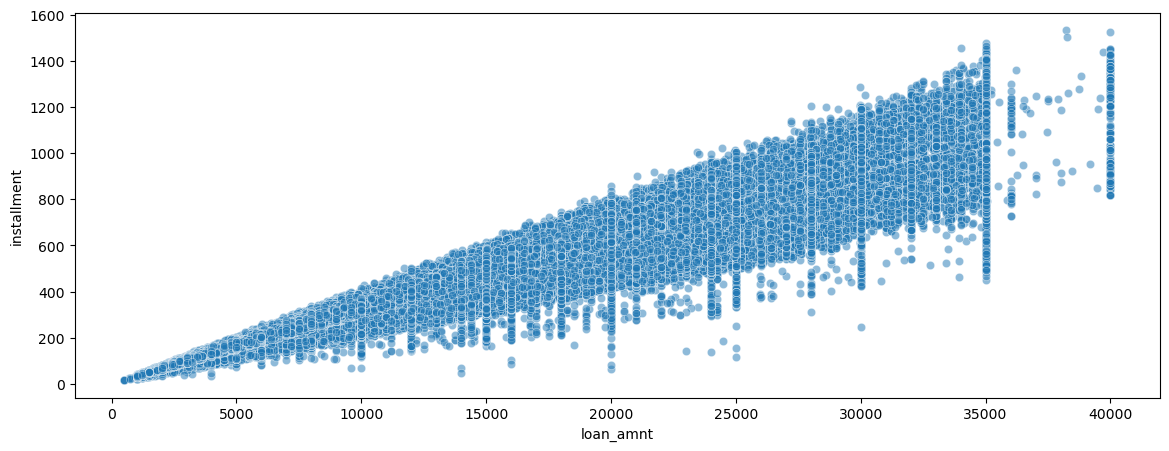

In [20]:
plt.figure(figsize=(14, 5))
sns.scatterplot(data = df, x = 'loan_amnt', y = 'installment', alpha = 0.5)
plt.show()

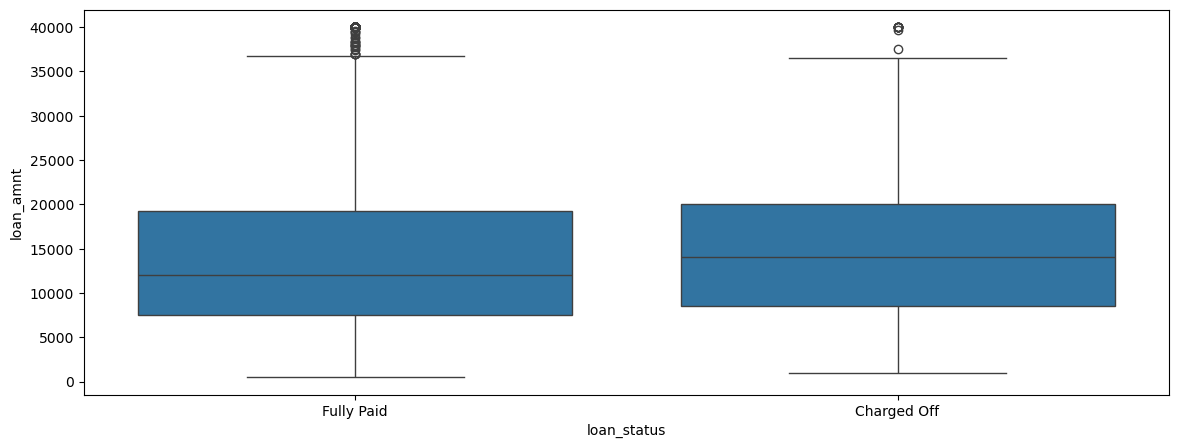

In [21]:
plt.figure(figsize=(14,5))
sns.boxplot(data = df, x = 'loan_status', y = 'loan_amnt')
plt.show()

In [22]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [23]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [24]:
ordered_sub_grade = sorted(df['sub_grade'].unique())
ordered_sub_grade

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

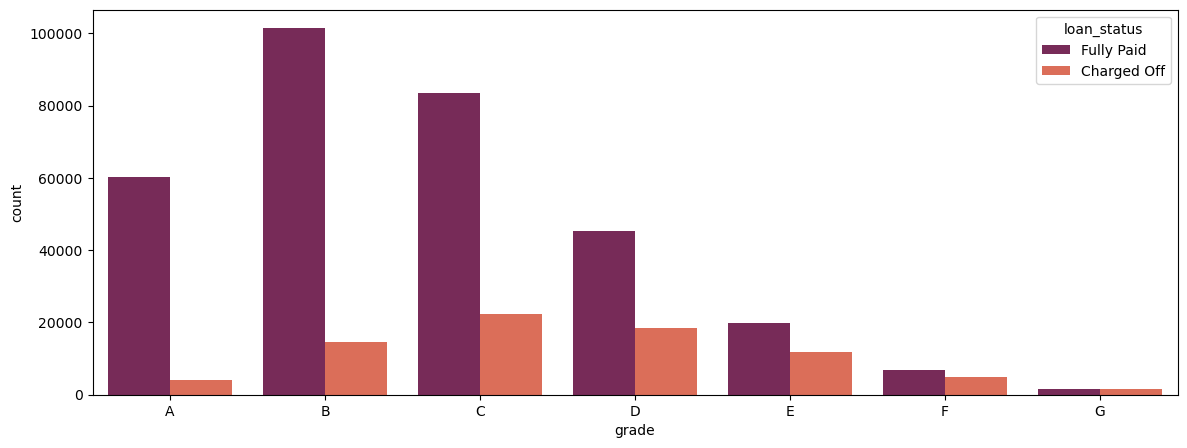

In [25]:
plt.figure(figsize=(14,5))
sns.countplot(data = df, x = 'grade', hue = 'loan_status', palette='rocket', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'] )
plt.show()

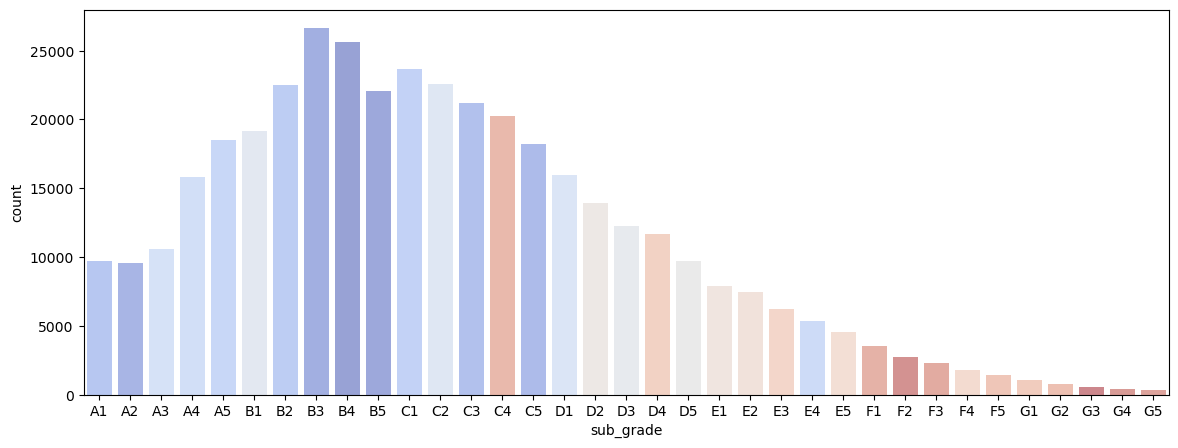

In [26]:
plt.figure(figsize=(14,5))
sns.countplot(data = df, x = 'sub_grade', hue = 'sub_grade', palette = 'coolwarm', alpha = 0.6, order = ordered_sub_grade)
plt.show()

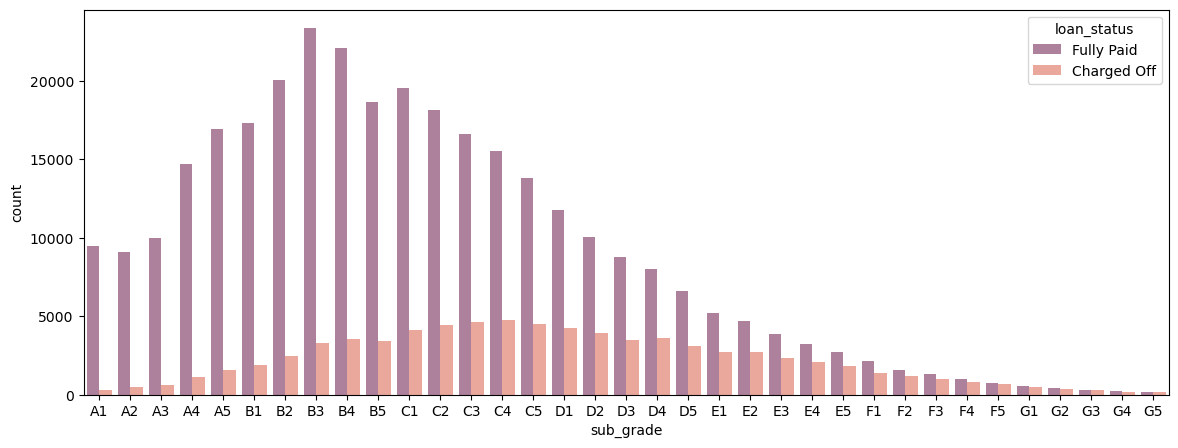

In [27]:
plt.figure(figsize=(14,5))
sns.countplot(data = df, x = 'sub_grade', hue = 'loan_status', palette = 'rocket', alpha = 0.6, order = ordered_sub_grade)
plt.show()

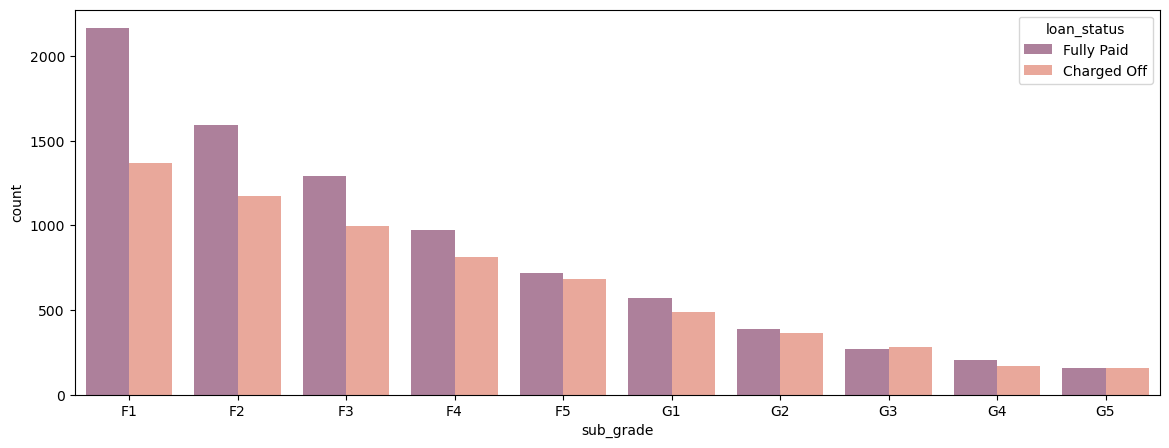

In [28]:
f_and_g = df[(df['grade'] == 'F') | (df['grade'] == 'G')]

ordered_sub_grade = sorted(f_and_g['sub_grade'].unique())
ordered_sub_grade

plt.figure(figsize=(14,5))
sns.countplot(data = f_and_g, x = 'sub_grade', hue = 'loan_status', palette = 'rocket', alpha = 0.6, order = ordered_sub_grade)
plt.show()

In [29]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

In [30]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


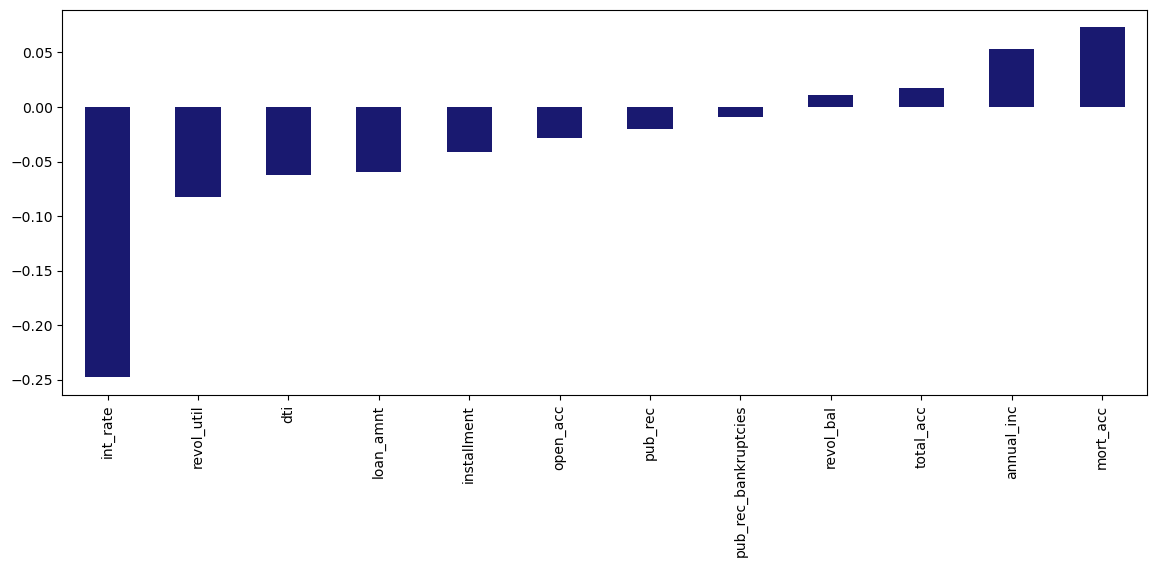

In [31]:
df.corr(numeric_only=True)['loan_repaid'].drop('loan_repaid').sort_values().plot(kind = 'bar', figsize = (14, 5), color = 'midnightblue')
plt.show()

# Data Preprocessing

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [34]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [35]:
# Calculate percentage of missing values
df.isna().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [36]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [37]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [38]:
df['emp_title'].nunique()

173105

In [39]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [40]:
# Drop emp_title as there are too many unique values to conver to dummy variables or categorise them
df = df.drop('emp_title', axis = 1)

In [41]:
# Column contains a mix of datatypes, floats (nan) and strings therefore drop nan to sort
ordered_length = sorted(df['emp_length'].dropna().unique())
ordered_length

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [42]:
ordered_length = [
 '< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'
]

ordered_length

['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

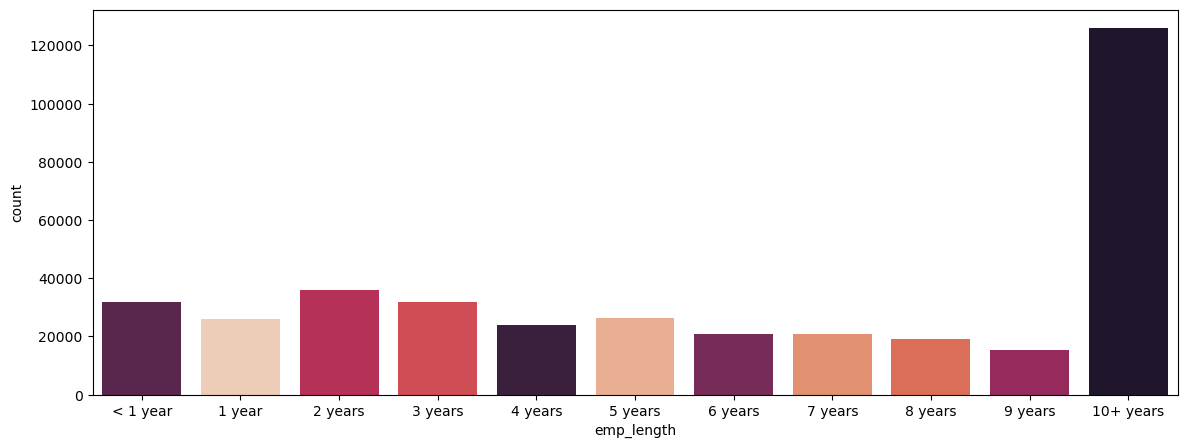

In [43]:
plt.figure(figsize=(14, 5))
sns.countplot(data = df, x = 'emp_length', hue = 'emp_length', palette = 'rocket', order = ordered_length, legend=False)
plt.show()

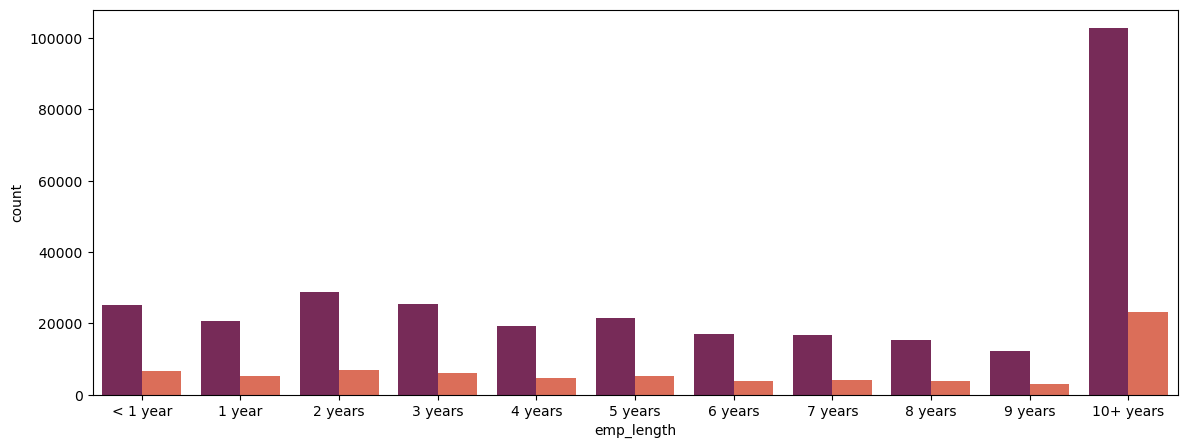

In [44]:
plt.figure(figsize=(14, 5))
sns.countplot(data = df, x = 'emp_length', hue = 'loan_status', palette = 'rocket', order = ordered_length, legend=False)
plt.show()

In [45]:
# Count how many instances of Fully Paid exists per length category
emp_fp = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']

In [46]:
# Count how many instances of Charged Off exists per length category
emp_co = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']

In [47]:
# Calculate percent charge off rate per year category
emp_co/(emp_fp+emp_co)*100

emp_length
1 year       19.913453
10+ years    18.418610
2 years      19.326206
3 years      19.523133
4 years      19.238477
5 years      19.218721
6 years      18.919438
7 years      19.477400
8 years      19.976002
9 years      20.047016
< 1 year     20.687155
Name: loan_status, dtype: float64

Similar ratio exists throughout each year, therefore emp_length does not help distinguishing between charged off and fully paid. Because of this it would make sense to drop this column, since it does not contribute to our cause.

In [49]:
df = df.drop('emp_length', axis = 1)

In [50]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [51]:
df['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

In [52]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

Title column seems to be the same as purpose column 


In [54]:
df = df.drop('title', axis = 1)

In [55]:
feat_info('mort_acc')

Number of mortgage accounts.


In [56]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

Roughly 10% of the data is missing for mortgage account. It wouldnt be unreasonable to drop this, but we can try to impute this based on a different column that might be highly correlated with this column.

In [58]:
df.corr(numeric_only=  True)['mort_acc'].sort_values(ascending = False)

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [59]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


We can calculate the mean value of mortgage acc per total acc, and then fill the missing values of mort_acc by the mean values corresponding to the total_acc

In [61]:
total_acc_avg = df.groupby('total_acc').mean(numeric_only=True)['mort_acc']
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [62]:
def impute_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [63]:
df['mort_acc'] = df.apply(lambda x: impute_mort_acc(x['total_acc'], x['mort_acc']), axis = 1)

In [64]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

Since the null values are such a small percentage, we can drop just the null value instances

In [66]:
df = df.dropna()

In [67]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

# Feature Engineering


In [69]:
# identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude = [np.number]).columns.tolist()
non_numeric_cols

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

### term

In [71]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [72]:
df['term'].value_counts()

term
36 months    301247
60 months     93972
Name: count, dtype: int64

We can convert term string to numeric. We could one hot encode them as well but we want to preserve the numeric relationship between them i.e. prsereve the assumption that more time would imply more chances of paying off loan.

In [74]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

### grade and sub_grade

Since grade is a superset of sub grade, we can drop grade

In [77]:
df = df.drop('grade', axis = 1)

In [78]:
# Convert sub grades to dummy variables
dummies = pd.get_dummies(df['sub_grade'], drop_first=True) #drop_first to avoid multi-collinearity

df = pd.concat([df.drop('sub_grade', axis = 1), dummies], axis = 1)

In [79]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

### verification_status, application_type, initial_list_status, purpose

In [81]:
#Convert verification_status, application_type, initial_list_status, purpose into dummy var
dummies = pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status', 'purpose']], drop_first=True)

df = pd.concat([df.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis = 1), dummies], axis = 1)

In [82]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

### home_ownership

In [84]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [85]:
df['home_ownership'] = df['home_ownership'].replace(['ANY', 'NONE'], 'OTHER')
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: count, dtype: int64

In [86]:
# Convert home_ownership to dummy variables
dummies = pd.get_dummies(df['home_ownership'], drop_first=True) #drop_first to avoid multi-collinearity

df = pd.concat([df.drop('home_ownership', axis = 1), dummies], axis = 1)

### address

In [88]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [89]:
df['zip_code'] = df['address'].apply(lambda address : address[-5:])

In [90]:
df['zip_code'].value_counts()

zip_code
70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: count, dtype: int64

In [91]:
# Convert zip_code to dummy variables
dummies = pd.get_dummies(df['zip_code'], drop_first=True) #drop_first to avoid multi-collinearity

df = pd.concat([df.drop('zip_code', axis = 1), dummies], axis = 1)

In [92]:
df = df.drop('address', axis = 1)

### issue_d

In [94]:
feat_info('issue_d')

The month which the loan was funded


Considering we are trying to determine whether someone will repay a loan, keeping issue_d would lead to data leakage. We woulndt issue a loan in the first place if we didnt think the perosn would repay the loan, hence to avoid this assumption, we can drop this feature.

In [96]:
df = df.drop('issue_d', axis = 1)

### earliest_cr_line

In [98]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


earliest_cr_line appears to be a time stamp feature, we can make a new feature based on the year extracted from this time stamp.

In [100]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda year : int(year[-4:]))
df['earliest_cr_line']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64

In [101]:
df['earliest_cr_line'].value_counts()

earliest_cr_line
2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: count, Length: 65, dtype: int64

# Data Preprocessing 

In [103]:
df = df.drop('loan_status', axis = 1)

In [187]:
from sklearn.model_selection import train_test_split

X = df.drop('loan_repaid', axis = 1).to_numpy()
y = df['loan_repaid'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [189]:
from sklearn.preprocessing import MinMaxScaler

In [195]:
scaler = MinMaxScaler()

In [197]:
X_train = scaler.fit_transform(X_train)

In [199]:
X_test = scaler.transform(X_test) # only transform, NOT FIT, to prvent data leakage

# Model Training 

In [202]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [204]:
X_train.shape

(316175, 78)

In [206]:
model = Sequential()

model.add(Dense(units = 78, activation = 'relu'))
model.add(Dropout(rate = 0.2))

model.add(Dense(units = 39, activation = 'relu'))
model.add(Dropout(rate = 0.2))

model.add(Dense(units = 19, activation = 'relu'))
model.add(Dropout(rate = 0.2))


model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [208]:
from tensorflow.keras.callbacks import EarlyStopping

In [210]:
early_stop = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 2)

In [212]:

model.fit(x = X_train, y = y_train, epochs = 25, batch_size=256, validation_data=(X_test, y_test), callbacks = [early_stop])

Epoch 1/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3517 - val_loss: 0.2644
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2647 - val_loss: 0.2628
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2623 - val_loss: 0.2629
Epoch 3: early stopping


# Model Evaluation 

In [215]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.297869,0.264401
1,0.265305,0.262846
2,0.262824,0.262864


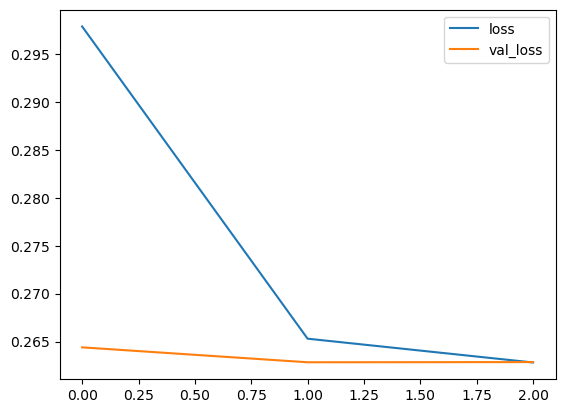

In [221]:
losses.plot()
plt.show()

In [223]:
from sklearn.metrics import confusion_matrix, classification_report

In [225]:
predictions = (model.predict(X_test) > 0.5).astype('int32')

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 2s 947us/step


In [227]:
print(confusion_matrix(y_test, predictions))
print('\n----------------------------------------------------------------------------------------------------------------------------\n')
print(classification_report(y_test, predictions))

[[ 6720  8938]
 [    0 63386]]

----------------------------------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



Due to the dataset being imbalanced, the model performs very well when identifying loan_repaid and performs relatively worse when identifying not repaid

# Predicting on New Data

In [231]:
import random

In [233]:
random.seed(101)
random_ind = random.randint(0, len(df))

new_customer = df.drop('loan_repaid', axis = 1).iloc[random_ind]
new_customer

loan_amnt      25000.0
term                60
int_rate         18.24
installment     638.11
annual_inc     61665.0
                ...   
30723             True
48052            False
70466            False
86630            False
93700            False
Name: 305323, Length: 78, dtype: object

In [239]:
new_customer = new_customer.to_numpy().reshape(1, 78)

In [243]:
new_customer = scaler.transform(new_customer)

In [245]:
pred = (model.predict(new_customer) > 0.5).astype('int32')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [247]:
pred

array([[1]])

In [249]:
df.iloc[random_ind]['loan_repaid']

1